In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

cars = pd.read_csv("../Cleaning/new_clean_data.csv", index_col=0)
columns = [
    "brand",
    "model",
    "price",
    "mileage",
    "year",
    "location",
    "date_added",
    "body_type",
    "fuel",
    "power",
    "transmission",
    "color",
    "engine_size",
]
sns.set_theme()

# THIS Function returns bins and labels in order to use them for the data division


In [3]:
def bins_labels(max, interval, unit, initial_value):
    bins = []
    labels = []
    bins.append(initial_value)
    labels.append("0" + str(unit) + "-" + str(interval + bins[-1]) + unit)
    # print("bin-1",bins[-1])
    while max > bins[-1]:
        bins.append(bins[-1] + interval)
        labels.append(str(bins[-1]) + unit + "-" + str(interval + bins[-1]) + unit)
    bins.append(float("inf"))
    labels.pop()
    labels.append(str(bins[-2]) + unit + "+")
    return {"bins": bins, "labels": labels}

# Divide prices in intervals


In [4]:
price_sorted_bins_labels = bins_labels(
    max=100000, interval=10000, unit="k", initial_value=0
)
labels = [
    "0-10k",
    "10k-20k",
    "20k-30k",
    "30k-40k",
    "40k-50k",
    "50k-60k",
    "60k-70k",
    "70k-80k",
    "80k-90k",
    "90k-100k",
    "100k+",
]
cars["price_sorted"] = pd.cut(
    cars["price"], bins=price_sorted_bins_labels["bins"], labels=labels
)

# Divide mileage in intervals to visualize them


In [5]:
mileage_bins_labels = bins_labels(
    max=600000, interval=100000, unit="km", initial_value=0
)
cars["_mileage"] = pd.cut(
    cars["mileage"],
    bins=mileage_bins_labels["bins"],
    labels=mileage_bins_labels["labels"],
)

# Correlation matrix between all float values


<Axes: >

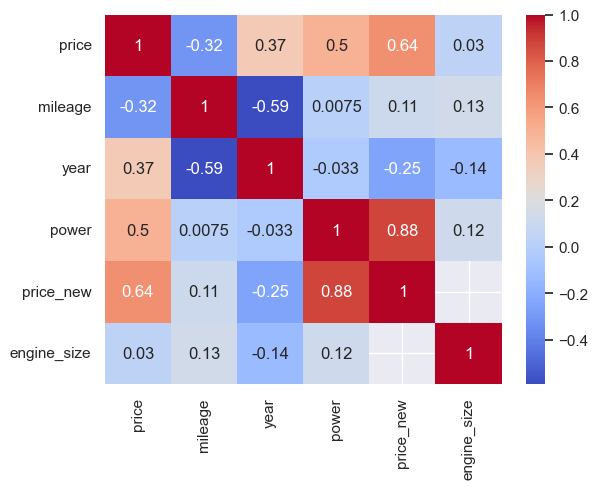

In [6]:
float_columns = cars.select_dtypes(include=["float", "int"]).columns

correlation = cars[float_columns].corr()
sns.heatmap(
    correlation,
    annot=True,
    cmap="coolwarm",
)

# Price vs Year


Text(0.5, 1.0, 'Price vs Year')

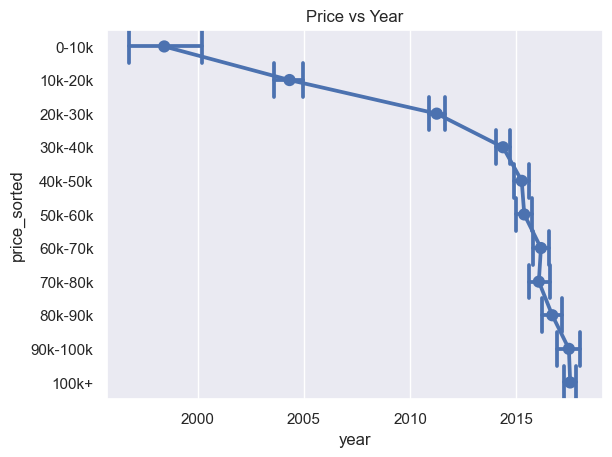

In [7]:
price_per_year = sns.pointplot(data=cars, y="price_sorted", x="year", capsize=True)
price_per_year.set_title("Price vs Year")

<h1> Price vs POWER</h1>


Text(0.5, 1.0, 'Price vs Power')

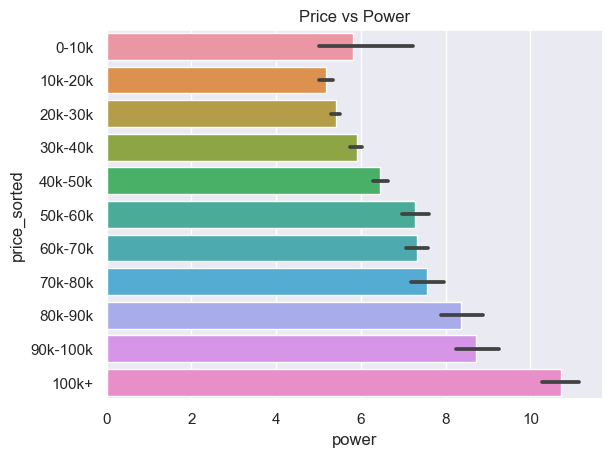

In [8]:
price_per_year = sns.barplot(data=cars, y="price_sorted", x="power")
price_per_year.set_title("Price vs Power")

# Price vs Mileage


Text(0.5, 1.0, 'Price vs mileage')

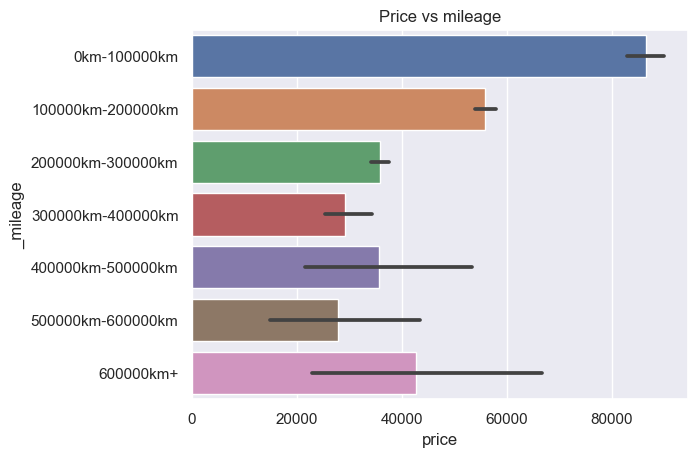

In [9]:
price_per_mileage = sns.barplot(
    data=cars,
    y="_mileage",
    x=columns[2],
)
price_per_mileage.set_title("Price vs mileage")

# Cars for sell per mileage


<Axes: title={'center': 'Count of Cars per Mileage'}, xlabel='count', ylabel='_mileage'>

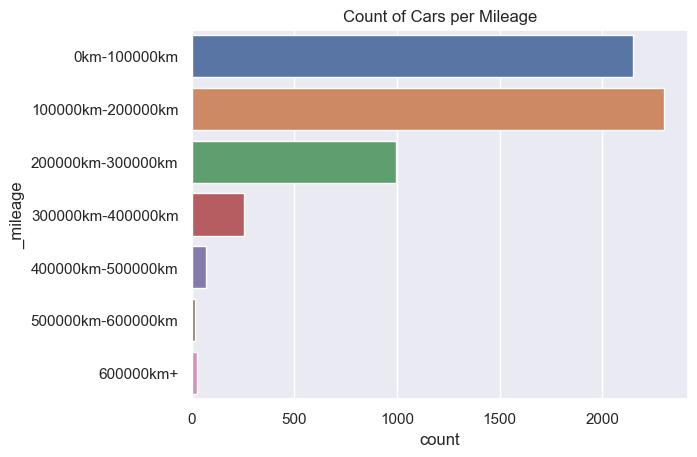

In [10]:
count_milage = sns.countplot(data=cars, y="_mileage")
count_milage.set_title("Count of Cars per Mileage")
count_milage

# Cars per Price Interval


<Axes: title={'center': 'Count Of cars Price Inverval'}, xlabel='count', ylabel='price_sorted'>

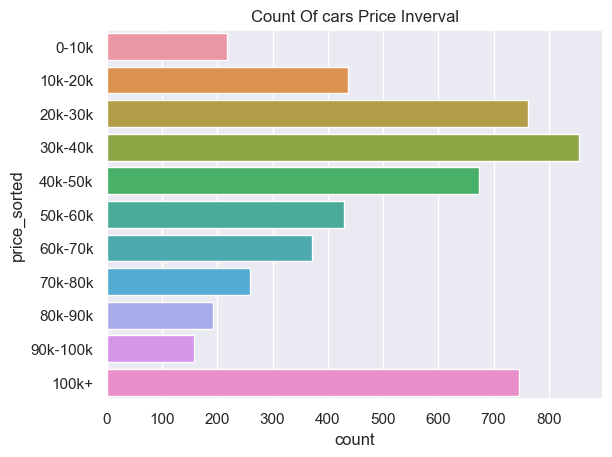

In [11]:
count_price = sns.countplot(data=cars, y="price_sorted")
count_price.set_title("Count Of cars Price Inverval")
count_price

# Price vs Mileage


Text(0.5, 1.0, 'Price vs Mileage')

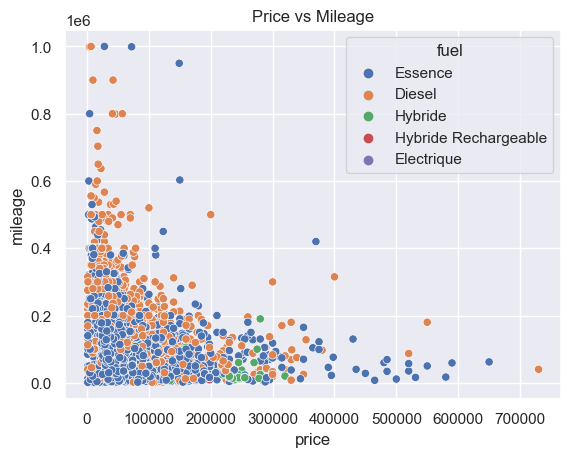

In [12]:
price_vs_mileage = sns.scatterplot(data=cars, y="mileage", x="price", hue="fuel")
price_vs_mileage.set_title("Price vs Mileage")

# Price per Engine Size


Text(0.5, 1.0, 'Price per Engine size')

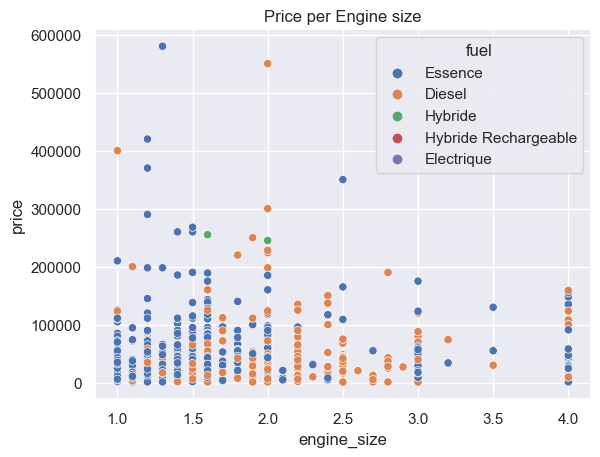

In [13]:
engine_size_price = sns.scatterplot(
    data=cars, x="engine_size", y=columns[2], hue="fuel"
)
engine_size_price.set_title("Price per Engine size")

# Cars Per Location


Text(0.5, 1.0, 'Cars per location')

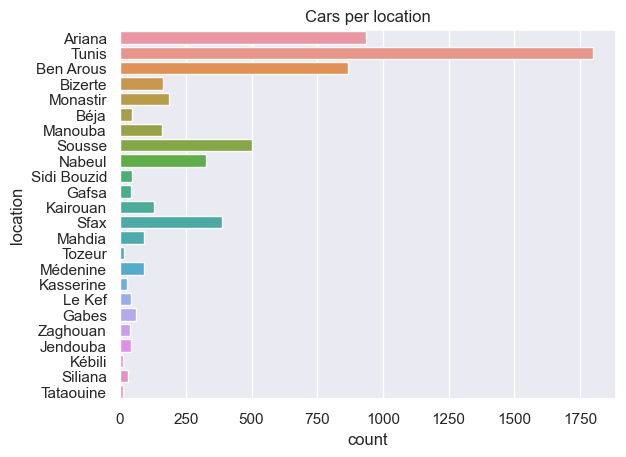

In [14]:
location_cars = sns.countplot(data=cars, y="location")
location_cars.set_title("Cars per location")

# Price vs Fuel


<Axes: xlabel='fuel', ylabel='price'>

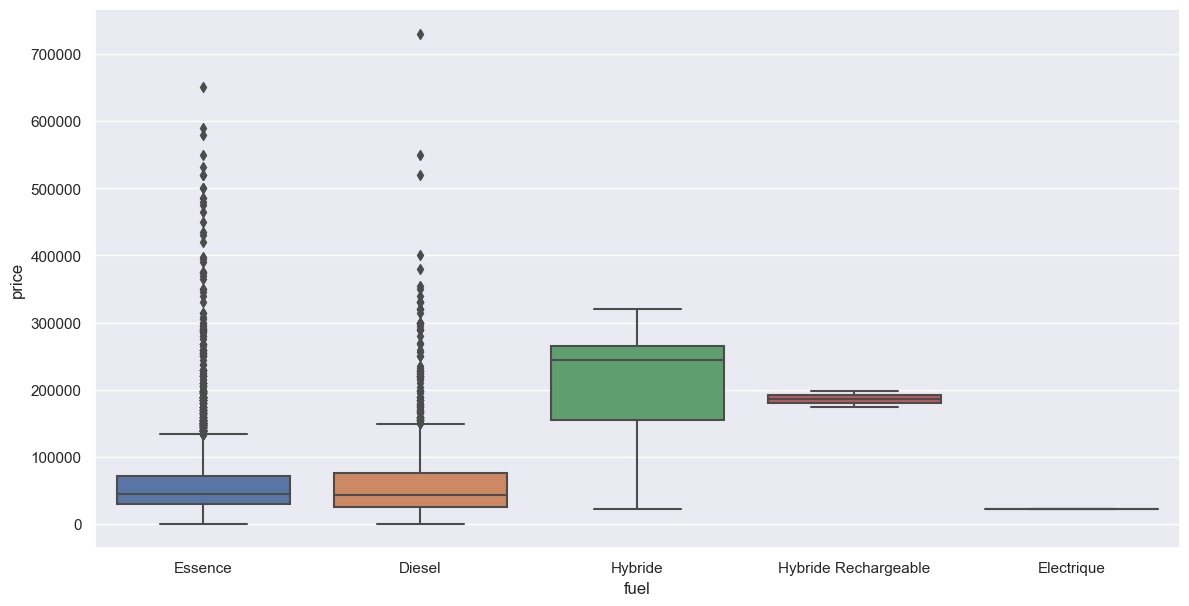

In [26]:
plt.subplots(figsize=(14, 7))
sns.boxplot(x="fuel", y="price", data=cars)

# Price vs Fuel and Transmission


<Axes: xlabel='transmission', ylabel='price'>

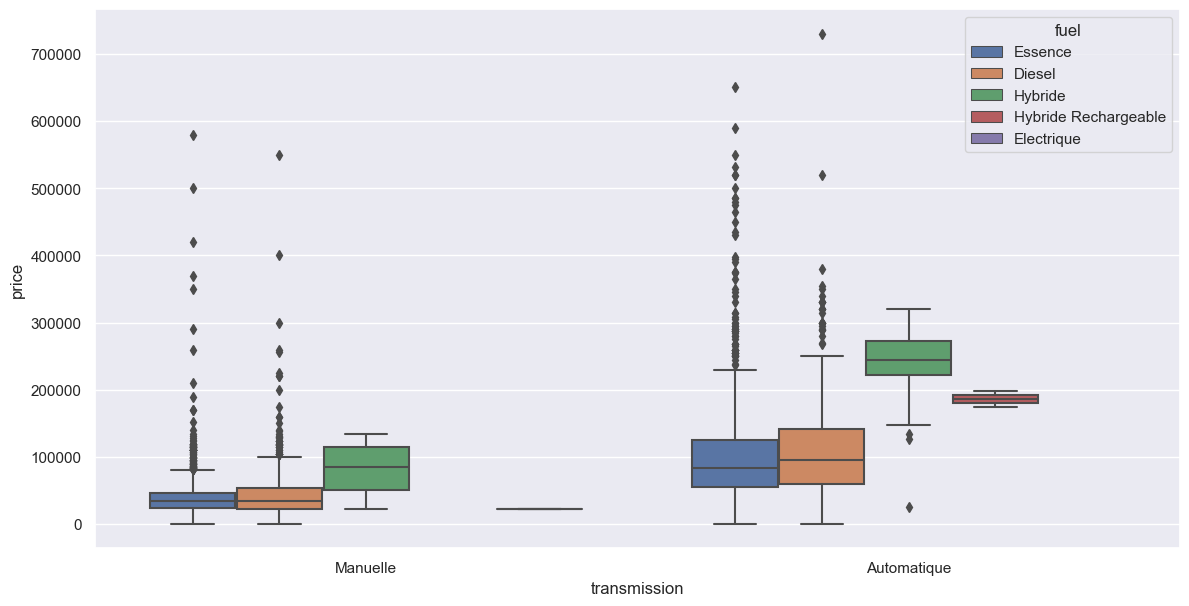

In [42]:
plt.subplots(figsize=(14, 7))
sns.boxplot(x="transmission", y="price", hue="fuel", data=cars)

# Top 15 Second Handed Cars Brands


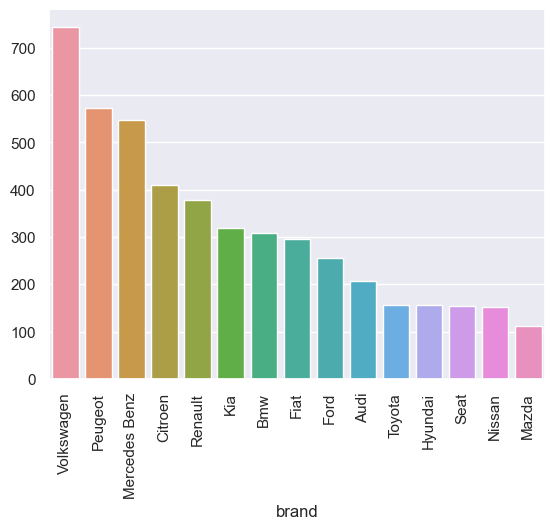

In [38]:
brand_counts = cars["brand"].value_counts()
top_brands = brand_counts.head(15)
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.xticks(rotation=90)
plt.show()

# Top 3 cars per Brand


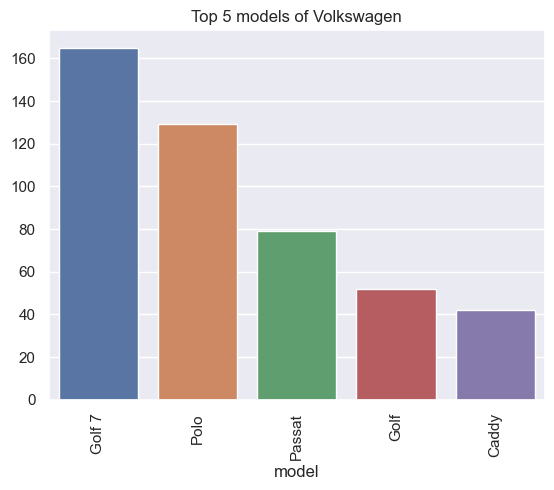

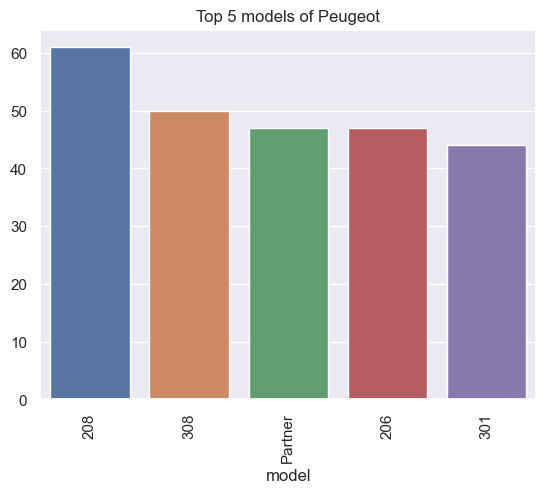

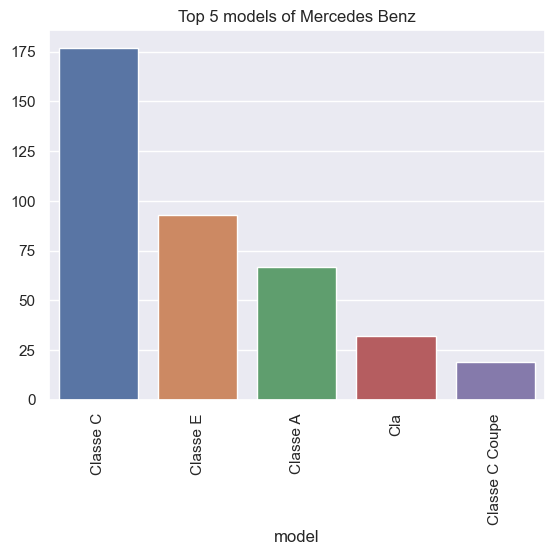

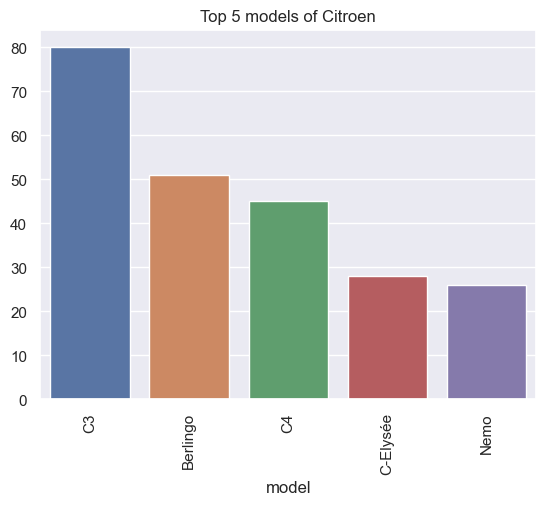

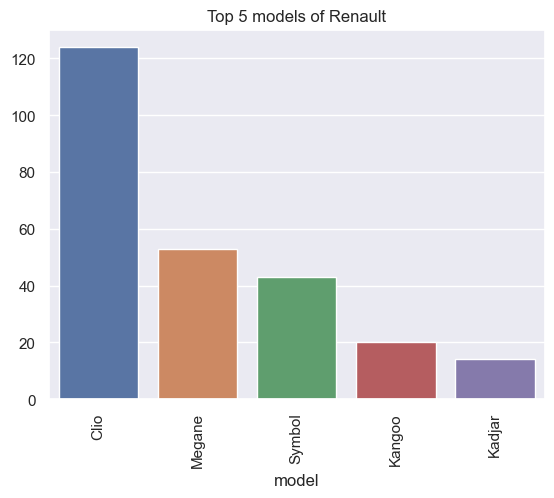

In [41]:
for brand in top_brands.index[:5]:
    df = cars.loc[cars["brand"] == brand]
    model_counts = df["model"].value_counts()
    top_models = model_counts.head(5)
    ax = sns.barplot(x=top_models.index, y=top_models.values)
    ax.set_title(f"Top 5 models of {brand}")
    plt.xticks(rotation=90)
    plt.show()